# Demagnetisation using periodic boundary conditions

## Setting the simulation

In [1]:
import dolfin as df
import numpy as np
import matplotlib.pyplot as plt
from finmag import Simulation as Sim
from finmag.energies import Demag
from finmag import MacroGeometry
%matplotlib inline

[2014-09-12 14:45:45] INFO: Finmag logging output will be appended to file: '/home/mb4e10/.finmag/global.log'
[2014-09-12 14:45:45] DEBUG: Building modules in 'native'...
[2014-09-12 14:45:46] DEBUG: FinMag          5438:1bb581759ff69c55bae9a12753e0a04f051a5d47
[2014-09-12 14:45:46] DEBUG: Dolfin          1.4.0                Matplotlib      1.3.1               
[2014-09-12 14:45:46] DEBUG: Numpy           1.8.1                Scipy           0.14.0              
[2014-09-12 14:45:46] DEBUG: IPython         2.1.0                Python          2.7.6               
[2014-09-12 14:45:46] DEBUG: Paraview        4.0.1-1ubuntu1       Sundials        2.5.0               
[2014-09-12 14:45:46] DEBUG: Boost-Python    <unknown>            Linux           Ubuntu 14.04.1 LTS  
[2014-09-12 14:45:46] DEBUG: Registering debug signal handler. Press Ctrl-Z at any time to stop execution and jump into the debugger.


The mesh unit cell is a box with edge length $a$ and number of vertices along one dimension $N_{v}$.

In [2]:
a = 5  # edge length (nm)
Nv = 5  # number of verices along one direction

mesh = df.BoxMesh(-a/2., -a/2., -a/2., a/2., a/2., a/2., Nv, Nv, Nv)

The simulation object is created with saturation magnetisation $M_\text{s} = 10^6$ A/m.

In [3]:
Ms = 1e6  # saturation magnetisation (A/m)
sim = Sim(mesh, Ms, unit_length=1e-9)

[2014-09-12 14:45:50] INFO: Finmag logging output will be written to file: '/home/mb4e10/finmag/doc/ipython_notebooks_src/unnamed.log' (any old content will be overwritten).
[2014-09-12 14:45:50] DEBUG: Creating DataWriter for file 'unnamed.ndt'
[2014-09-12 14:45:50] INFO: Creating Sim object 'unnamed' (rank=0/1).
[2014-09-12 14:45:50] INFO: <Mesh of topological dimension 3 (tetrahedra) with 216 vertices and 750 cells, ordered>
[2014-09-12 14:45:50] DEBUG: Creating LLG object.


Demag object is created using already defined lattice and added to the simulation:

In [4]:
n = 5
demag = Demag(macrogeometry=MacroGeometry(nx=n))
sim.add(demag)

[2014-09-12 14:45:51] DEBUG: Creating Demag object with solver 'FK'.
[2014-09-12 14:45:51] DEBUG: Adding interaction Demag to simulation.
[2014-09-12 14:45:51] DEBUG: Using Krylov solver for demag.
[2014-09-12 14:45:51] DEBUG: Creating macro-geometry with demag 5 x 1 tiles (dxdy: 5.0 x 5.0)
[2014-09-12 14:45:52] DEBUG: Boundary element matrix uses 0.18 MB of memory.


Now, the demagnetisation field can be computed for different magnetisation configurations. For instance:

In [5]:
sim.set_m((0, 0, 1))
field = sim.llg.effective_field.get_dolfin_function('Demag')

At a particular point in the mesh, the field value can be extracted:

In [6]:
field_at_point = field(0, 0, 0)
print field_at_point

[  2.76201545e+02   2.06076124e+04  -4.88198509e+05]


## Demagnetisation field for different number of elements in the lattice

An array of possible numbers of ellements in the lattice:

In [7]:
ns = np.arange(1, 30, 2)
print ns

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]


The first part of this notebook implemented as a function which returns demagnetisation field for two different magnetisation configurations (0, 0, 1) and (1, 0, 0):


In [8]:
a = 10  # edge length (nm)
Nv = 10  # number of verices along one direction

mesh = df.BoxMesh(-a/2., -a/2., -a/2., a/2., a/2., a/2., Nv, Nv, Nv)

Ms = 1e6  # saturation magnetisation (A/m)
sim = Sim(mesh, Ms, unit_length=1e-9)

def compute_fields(n):
    demag = Demag(macrogeometry=MacroGeometry(nx=n))
    sim.add(demag)
    
    sim.set_m((1, 0, 0))
    field1 = sim.llg.effective_field.get_dolfin_function('Demag')
    
    sim.set_m((0, 0, 1))
    field2 = sim.llg.effective_field.get_dolfin_function('Demag')
    
    sim.remove_interaction('Demag')
    
    return field1(0, 0, 0)/Ms, field2(0, 0, 0)/Ms

[2014-09-12 14:46:03] INFO: Finmag logging output will be written to file: '/home/mb4e10/finmag/doc/ipython_notebooks_src/unnamed.log' (any old content will be overwritten).
[2014-09-12 14:46:03] DEBUG: Creating DataWriter for file 'unnamed.ndt'
[2014-09-12 14:46:03] INFO: Creating Sim object 'unnamed' (rank=0/1).
[2014-09-12 14:46:03] INFO: <Mesh of topological dimension 3 (tetrahedra) with 1331 vertices and 6000 cells, ordered>
[2014-09-12 14:46:03] DEBUG: Creating LLG object.


Now, the field is computed for different values of $n$ and plotted:

In [9]:
field1_list = []
field2_list = []

for i in ns:
    fields = compute_fields(i)
    field1_list.append(fields[0][0])
    field2_list.append(fields[1][2])

[2014-09-12 14:46:05] DEBUG: Creating Demag object with solver 'FK'.
[2014-09-12 14:46:05] DEBUG: Adding interaction Demag to simulation.
[2014-09-12 14:46:05] DEBUG: Using Krylov solver for demag.
[2014-09-12 14:46:05] DEBUG: Creating macro-geometry with demag 1 x 1 tiles (dxdy: 10.0 x 10.0)
[2014-09-12 14:46:06] DEBUG: Boundary element matrix uses 2.76 MB of memory.
[2014-09-12 14:46:06] DEBUG: Removing interaction 'Demag' from simulation 'unnamed'
[2014-09-12 14:46:06] DEBUG: 'Deleting' get method for E_Demag in TableWriter(name=unnamed.ndt)
[2014-09-12 14:46:06] DEBUG: 'Deleting' get method for E_Demag in TableWriter(name=unnamed.ndt)
[2014-09-12 14:46:06] DEBUG: Creating Demag object with solver 'FK'.
[2014-09-12 14:46:06] DEBUG: Adding interaction Demag to simulation.
[2014-09-12 14:46:06] DEBUG: Using Krylov solver for demag.
[2014-09-12 14:46:06] DEBUG: Creating macro-geometry with demag 3 x 1 tiles (dxdy: 10.0 x 10.0)
[2014-09-12 14:46:07] DEBUG: Boundary element matrix uses 2

AssertionError: Attempt to add a second 'E_Demag' to entities for unnamed.ndt

/usr/lib/pymodules/python2.7/matplotlib/figure.py:1595: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


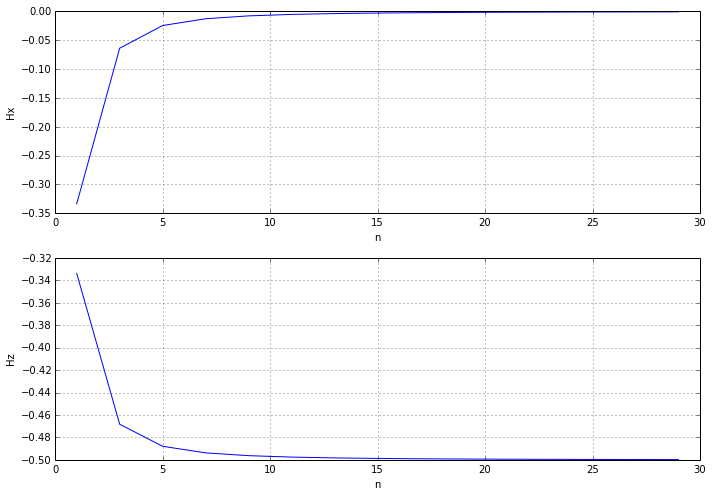

In [12]:
plt.figure(figsize=(10, 7))
plt.subplot(211)
plt.plot(ns, field1_list)
plt.xlabel('n')
plt.ylabel('Hx')
plt.grid()

plt.subplot(212)
plt.plot(ns, field2_list)
plt.xlabel('n')
plt.ylabel('Hz')
plt.grid()